# A small Test of Parallax Shift

First, import the needed packages and modules.

In [40]:
%matplotlib inline
import os, sys, glob

import numpy as np
import pylab as pl
import pandas as pd
#import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.ndimage as ndi
import scipy
from skimage.measure import regionprops as regionprops 

sys.path.append("../cieval/cieval/")
import cieval_config as cc
import cieval_data_io as cdio
import cieval_tools as ct
import cieval_plotting_tools as cpt       

from tropy.analysis_tools import grid_and_interpolation as gi
from tropy.plotting_tools.colormaps import enhanced_colormap
from tropy.analysis_tools import segmentation as sgm


pl.rcParams['figure.figsize'] = (16.0, 12.0)
pl.rcParams['font.size'] = 16.0

pl.rcParams['lines.linewidth'] = 3

## Read Test Data

### Set Date

In [17]:
dates = cc.case_days
date = dates[-1]

### Read Field Data

In [49]:
        hrv_data = cdio.load_cieval_data(date,"hrv")
        cma_data = cdio.load_cieval_data(date,"cma")
        ct_data = cdio.load_cieval_data(date,"ct")
        rx_data = cdio.load_cieval_data(date,"rx")
        ir_data = cdio.load_cieval_data(date,"ir108")
        
        
        
        hrv_objects = ct.segment_hrv_data(hrv_data.hrv.data,
                                          cma_data.cma.data,
                                          ct_data.ct.data,
                                          scale_factor=2,
                                          segmentation_dim='2d',
                                          threshold=0.3)


hrv data for 20130620 successfully loaded.
cma data for 20130620 successfully loaded.
ct data for 20130620 successfully loaded.
rx data for 20130620 successfully loaded.
ir108 data for 20130620 successfully loaded.


In [242]:
        time = [pd.Timestamp(t).strftime("%Y%m%d_%H%M") for t in hrv_data.time.data]
        
        
        # mask HRV data where there is no radar range
        hrv_masked = hrv_data.hrv.data.copy() 
        
        hrv_objects = ct.segment_hrv_data(hrv_masked,
                                          cma_data.cma.data,
                                          ct_data.ct.data,
                                          scale_factor=2,
                                          segmentation_dim='2d',
                                          threshold=None)



### Read Graphs

In [244]:
graphs = glob.glob("{}hrv_object_tracks/hrv_object_track_{}*.csv".format(cc.cieval_data_path,date))

In [245]:
print graphs
graph = graphs[10]

['/vols/talos/home/stephan/proj/2018-05_cieval/data/hrv_object_tracks/hrv_object_track_20130620_0000000.csv', '/vols/talos/home/stephan/proj/2018-05_cieval/data/hrv_object_tracks/hrv_object_track_20130620_0000001.csv', '/vols/talos/home/stephan/proj/2018-05_cieval/data/hrv_object_tracks/hrv_object_track_20130620_0000002.csv', '/vols/talos/home/stephan/proj/2018-05_cieval/data/hrv_object_tracks/hrv_object_track_20130620_0000003.csv', '/vols/talos/home/stephan/proj/2018-05_cieval/data/hrv_object_tracks/hrv_object_track_20130620_0000004.csv', '/vols/talos/home/stephan/proj/2018-05_cieval/data/hrv_object_tracks/hrv_object_track_20130620_0000005.csv', '/vols/talos/home/stephan/proj/2018-05_cieval/data/hrv_object_tracks/hrv_object_track_20130620_0000006.csv', '/vols/talos/home/stephan/proj/2018-05_cieval/data/hrv_object_tracks/hrv_object_track_20130620_0000007.csv', '/vols/talos/home/stephan/proj/2018-05_cieval/data/hrv_object_tracks/hrv_object_track_20130620_0000008.csv', '/vols/talos/home/

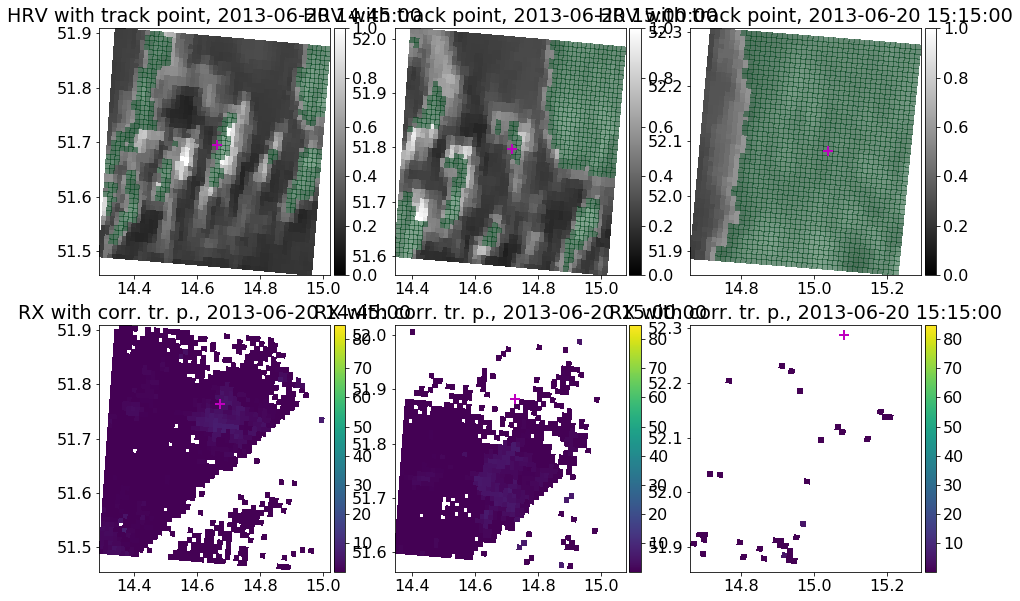

In [246]:
if True:
            graph_data = pd.read_csv(graph)
            
            n_time_steps  = len(graph_data.time)
            graph_data = graph_data.assign(tstep = [(int(t[-8:-6])*60 + int(t[-5:-3])) / 15 for t in graph_data.time])
                   
        
            plot = cpt.plot_graph_with_hrv(graph_data,hrv_data.hrv.data,rx_data.dbz.data,hrv_objects,hrv_data.lon.data,hrv_data.lat.data,50)
            


In [198]:
hrv_data.time


<xarray.DataArray 'time' (time: 96)>
array(['2013-06-20T00:00:00.000000000', '2013-06-20T00:15:00.000000000',
       '2013-06-20T00:30:00.000000000', '2013-06-20T00:45:00.000000000',
       '2013-06-20T01:00:00.000000000', '2013-06-20T01:15:00.000000000',
       '2013-06-20T01:30:00.000000000', '2013-06-20T01:45:00.000000000',
       '2013-06-20T02:00:00.000000000', '2013-06-20T02:15:00.000000000',
       '2013-06-20T02:30:00.000000000', '2013-06-20T02:45:00.000000000',
       '2013-06-20T03:00:00.000000000', '2013-06-20T03:15:00.000000000',
       '2013-06-20T03:30:00.000000000', '2013-06-20T03:45:00.000000000',
       '2013-06-20T04:00:00.000000000', '2013-06-20T04:15:00.000000000',
       '2013-06-20T04:30:00.000000000', '2013-06-20T04:45:00.000000000',
       '2013-06-20T05:00:00.000000000', '2013-06-20T05:15:00.000000000',
       '2013-06-20T05:30:00.000000000', '2013-06-20T05:45:00.000000000',
       '2013-06-20T06:00:00.000000000', '2013-06-20T06:15:00.000000000',
       '2013-0

In [253]:
i = itime
print hrv_data.time[i]

<xarray.DataArray 'time' ()>
array(1371739500000000000L, dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2013-06-20T14:45:00


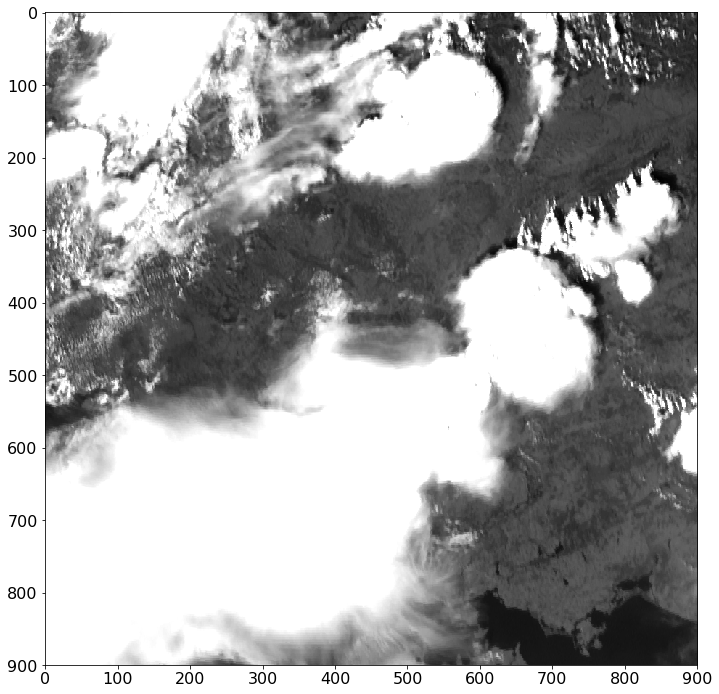

In [254]:
pl.imshow(hrv_data.hrv.data[i], cmap = pl.cm.gray, vmax = 0.6)

(0, 900)

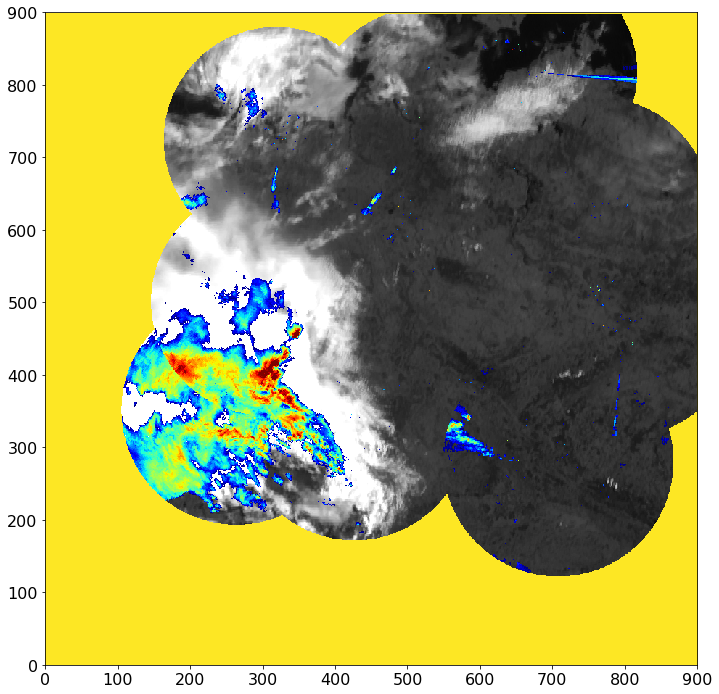

In [283]:
rx = np.ma.masked_outside(rx_data.dbz.data[3*i], 10, 70)
rm = np.ma.masked_less(rx_data.dbz.data[3*i], 70)

pl.imshow(hrv_data.hrv.data[i], cmap = pl.cm.gray, vmax = 0.7)
pl.imshow(rx, vmax = 50, cmap = pl.cm.jet)
pl.imshow(rm, vmin = -100)

pl.ylim(0,900)

(0, 900)

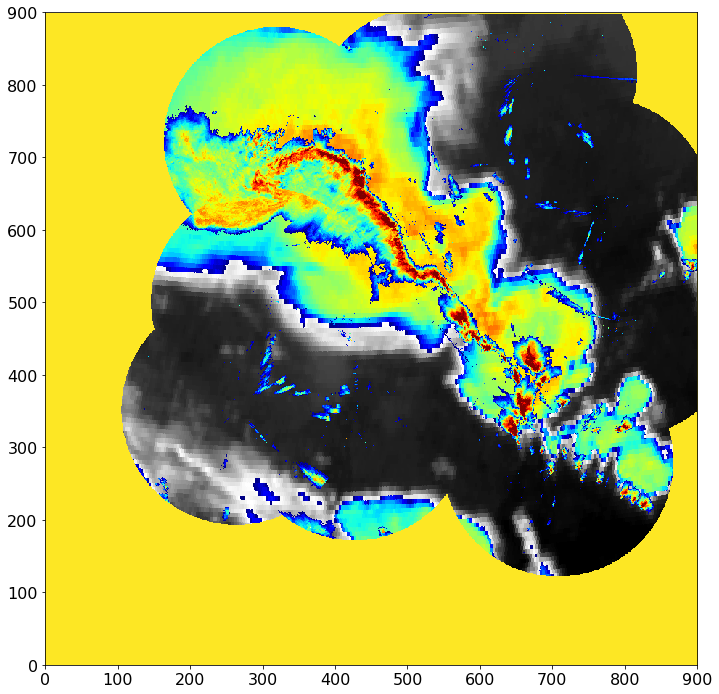

In [256]:
cmap = enhanced_colormap(vmin = 200)
pl.imshow(ir_data.ir108.data[i], cmap = cmap, vmin = 200, vmax = 300)
pl.imshow(rx, vmax = 50, cmap = pl.cm.jet)
pl.imshow(rm, vmin = -100)

pl.ylim(0,900)

In [232]:
from tropy.io_tools.radolan import Radolan

r = Radolan()

In [233]:
t = pd.Timestamp(  hrv_data.time.data[i]  ).to_pydatetime()
r.read(t)


Region suggests use of hdf file
Region suggests use of hdf file


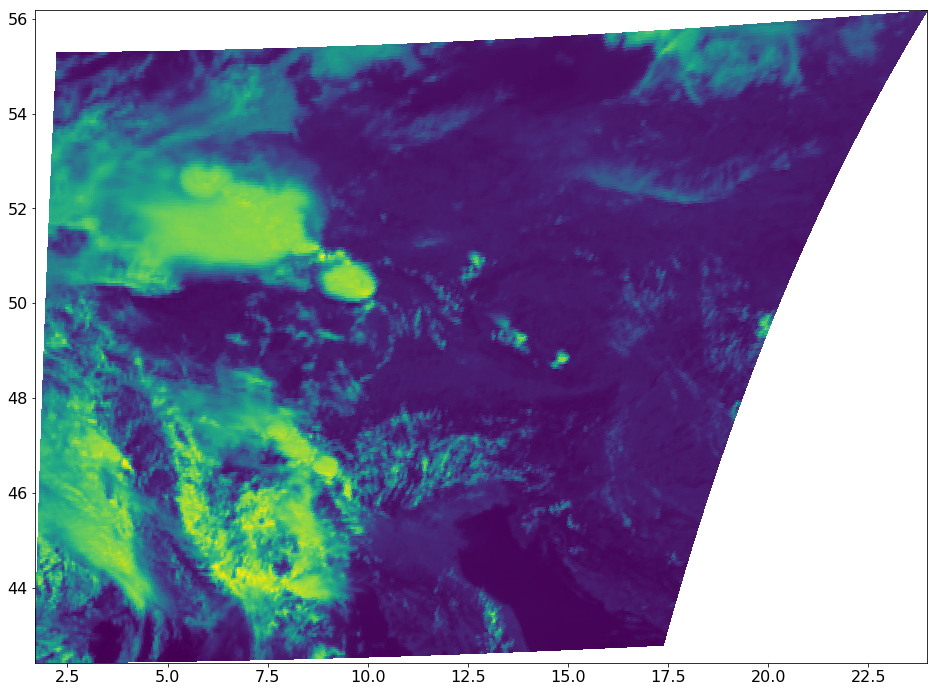

In [234]:
from tropy.l15_msevi.msevi import MSevi

s = MSevi(scan_type = 'pzs', region = ((250,500), (1900, 2300)), time = t)
s.load('VIS006')
s.load('HRV')
s.rad2refl()
s.sunzen()
s.lonlat()

pl.pcolormesh(s.lon, s.lat, s.rad['VIS006'])

In [235]:
ind = gi.create_interpolation_index(s.hlon, s.hlat, r.lon, r.lat)

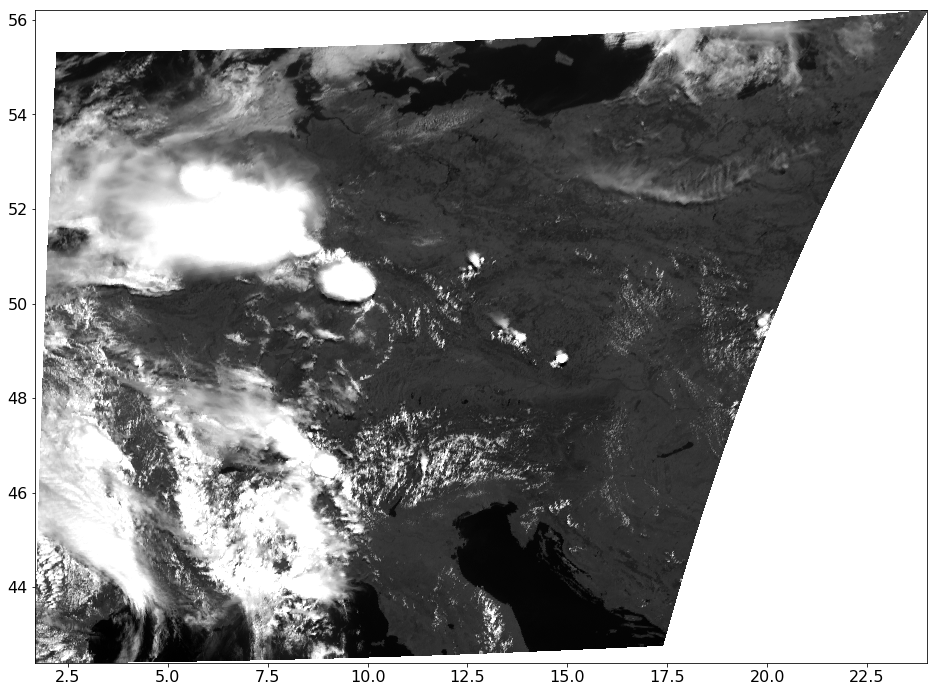

In [236]:
pl.pcolormesh(s.hlon, s.hlat, s.ref['HRV'], cmap = pl.cm.gray, vmax = 0.7)

In [237]:
s.sunzen()

In [238]:
coszen = np.cos( np.deg2rad( s.hszen ))

h = s.ref['HRV'] / coszen

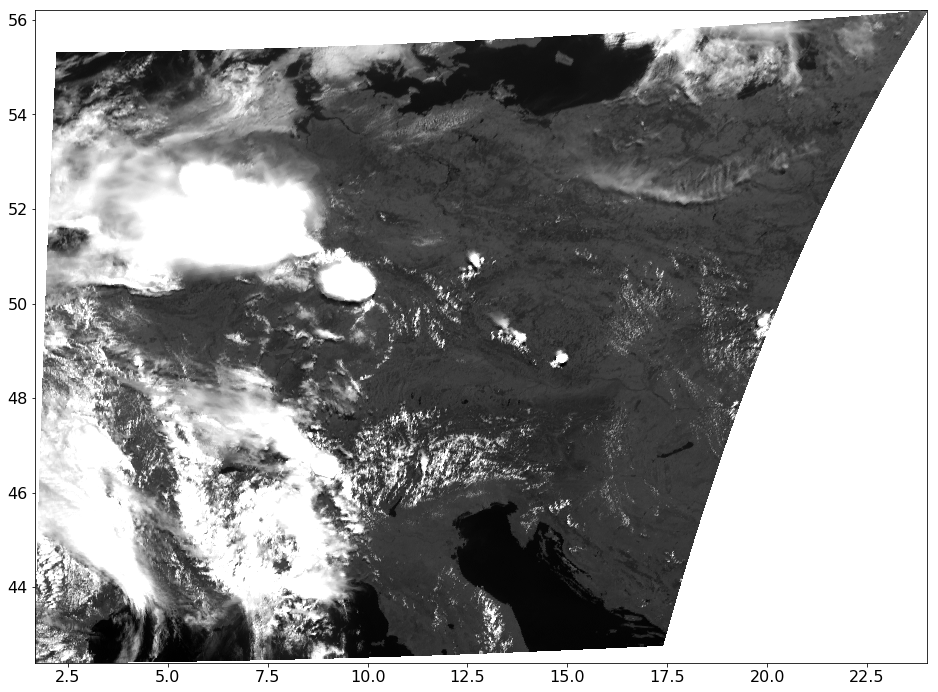

In [239]:
pl.pcolormesh(s.hlon, s.hlat, h, cmap = pl.cm.gray, vmax = 0.7)

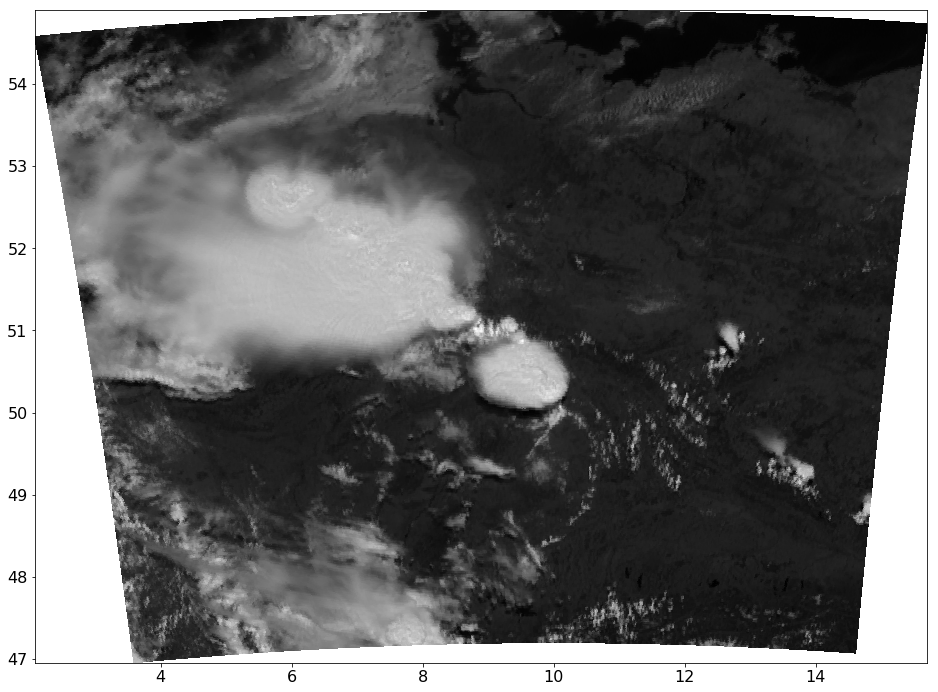

In [240]:
pl.pcolormesh(r.lon, r.lat, h[ind], cmap = pl.cm.gray)

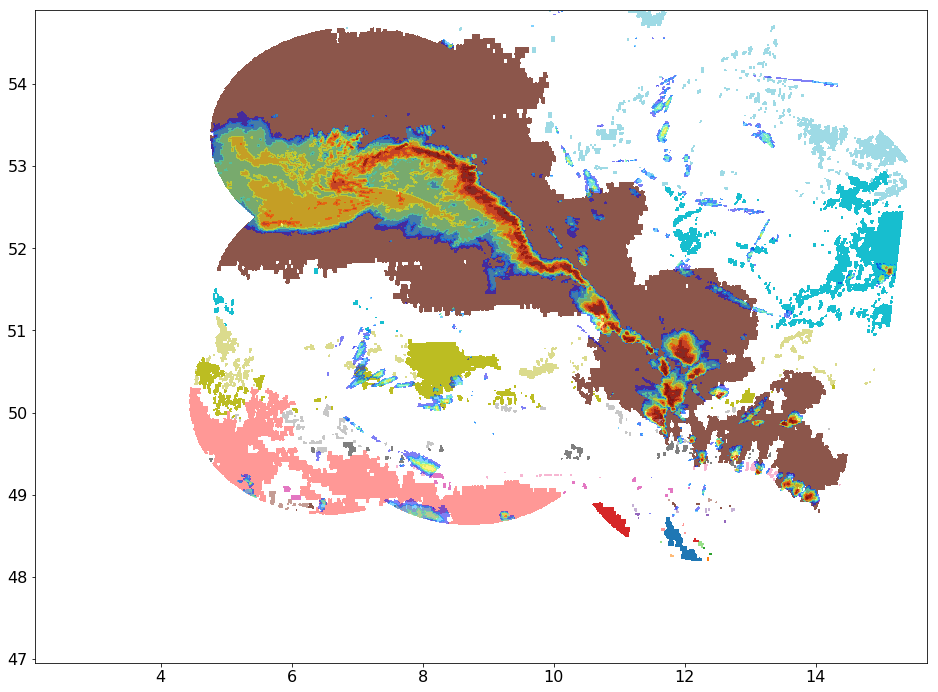

In [282]:
pl.pcolormesh(r.lon, r.lat, np.ma.log(hrv_objects[i]), cmap = pl.cm.tab20)
pl.contourf(r.lon, r.lat, rx, vmax = 50, cmap = pl.cm.jet, alpha = 0.5)


In [247]:
graph_data

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1    col  label  object_size    row  \
0           0             0               0  859.0    216           64  543.5   
1           1             1               1  862.0    232           67  556.0   
2           2             2               2  882.0    211         4561  591.0   

                  time  row_corr  col_corr  tstep  
0  2013-06-20 14:45:00       536       859     59  
1  2013-06-20 15:00:00       546       862     60  
2  2013-06-20 15:15:00       567       881     61

In [66]:
        # create radar mask
        rx_mask = np.ma.masked_where(rx_data.dbz.data>=92.5,rx_data.dbz.data)
        
        rmask = []
        
        for i in np.arange(2,288,3):
            idx = np.arange(i-2,i+1)
            
            aggregate = np.sum(~rx_mask[idx].mask*1,axis=0)
            aggregate[aggregate!=0]  =1
            
            rmask.append(aggregate)
        
        
        
        time = [pd.Timestamp(t).strftime("%Y%m%d_%H%M") for t in hrv_data.time.data]
        
        
        # mask HRV data where there is no radar range
        hrv_masked = hrv_data.hrv.data.copy() #* rmask
        
        hrv_objects = ct.segment_hrv_data(hrv_masked[20:68],
                                          cma_data.cma.data[20:68],
                                          0*ct_data.ct.data[20:68],
                                          scale_factor=2,
                                          segmentation_dim='2d',
                                          threshold=None)


In [275]:
t0 = graph_data.time[0]
itime = graph_data.tstep[0]
print t0, itime, hrv_data.time.data[itime]

2013-06-20 14:45:00 59 2013-06-20T14:45:00.000000000


(0, 900)

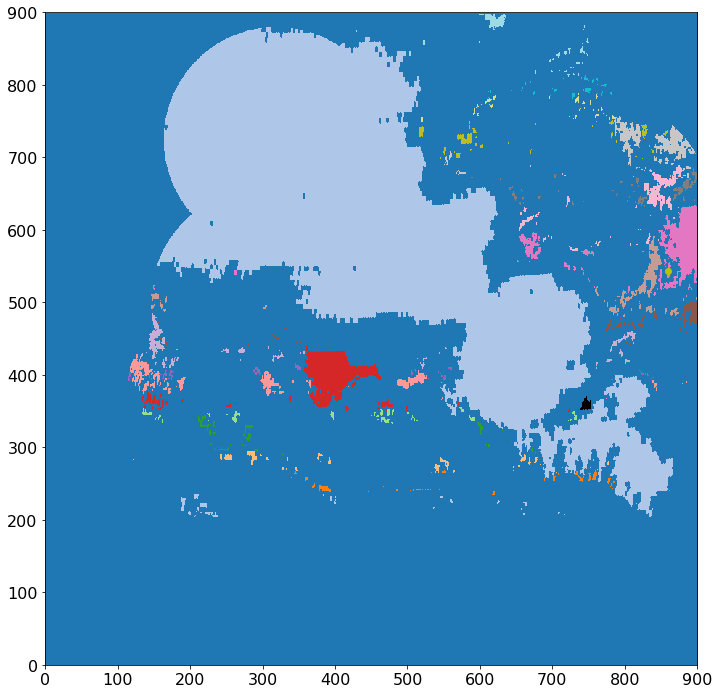

In [281]:
i = itime - 20
pl.imshow( hrv_objects[i], cmap = pl.cm.tab20)
pl.imshow( np.ma.masked_where(hrv_objects[i]!=216, hrv_objects[i]), cmap = pl.cm.gray)
pl.plot(graph_data.col[0], graph_data.row[0], 'yo')
pl.ylim(0,900)

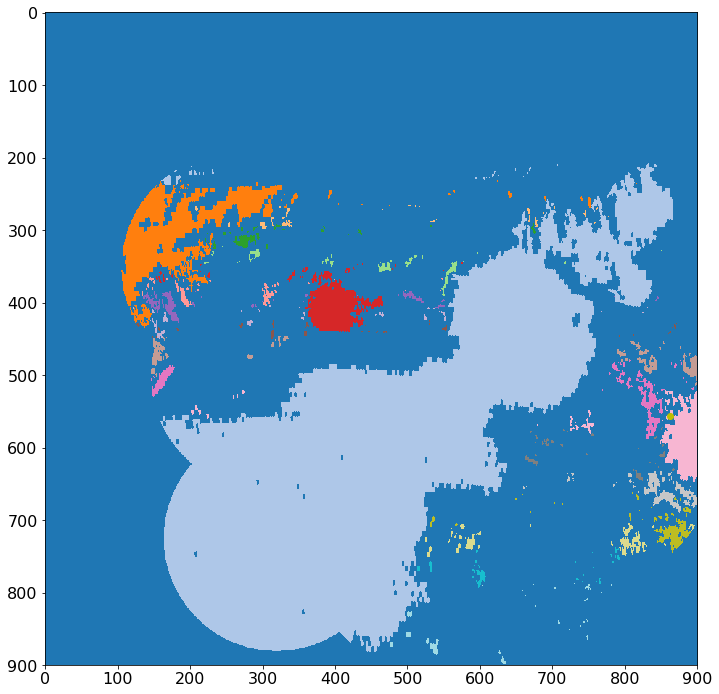

In [280]:
pl.imshow( hrv_objects[i+1], cmap = pl.cm.tab20)
pl.imshow( np.ma.masked_where(hrv_objects[i+1]!=232, hrv_objects[i+1]), cmap = pl.cm.gray)
pl.plot(graph_data.col[1], graph_data.row[1], 'yo')

## Reimplementation Test of Graph Analysis

In [2]:
# %load ../cieval/cieval/scripts/get_hrv_object_graphs.py
#!/usr/bin/env python2
"""
Created on Tue Jul 24 09:29:59 2018

@author: lenk
"""
import pandas as pd
import numpy as np
import datetime
 
import sys
#sys.path.append("/vols/talos/home/stephan/proj/2018-05_cieval/python")
sys.path.append('../cieval/cieval/')
import cieval_config as cc
import cieval_tools as ct
import cieval_data_io as cdio

import click
import networkx as nx

save_folder = "{}hrv_object_tracks/".format(cc.cieval_data_path)
graph_folder = "{}hrv_object_graphs/".format(cc.cieval_data_path)

In [67]:
if __name__ == "__main__":
    
    dates = cc.case_days
    dates = [dates[-1],]

    click.echo(click.style('+--------------------------------------+', fg='white',bg='blue'))
    click.echo(click.style('| Deriving object tracks from HRV data |', fg='white',bg='blue'))
    click.echo(click.style('+--------------------------------------+', fg='white',bg='blue'))
    
    for date in dates:
        click.echo(click.style('Processing {}...'.format(date), fg='white',bg='blue'))
        click.echo(click.style('Loading and processing needed data...', fg='white',bg='blue'))
        hrv_data = cdio.load_cieval_data(date,'hrv')
        cma_data = cdio.load_cieval_data(date,'cma')
        ct_data = cdio.load_cieval_data(date,'ct')
        flow_data = cdio.load_cieval_product_flow(date,"hrv")
        
        rx_data = cdio.load_cieval_data(date,'rx')
        
        # create radar mask
        rx_mask = np.ma.masked_where(rx_data.dbz.data>=92.5,rx_data.dbz.data)
        
        rmask = []
        
        for i in np.arange(2,288,3):
            idx = np.arange(i-2,i+1)
            
            aggregate = np.sum(~rx_mask[idx].mask*1,axis=0)
            aggregate[aggregate!=0]  =1
            
            rmask.append(aggregate)
        
        
        
        time = [pd.Timestamp(t).strftime("%Y%m%d_%H%M") for t in hrv_data.time.data]
        
        click.echo(click.style('Segmentation of HRV data...', fg='white',bg='blue'))
        
        # mask HRV data where there is no radar range
        hrv_masked = hrv_data.hrv.data.copy() #* rmask
        
        hrv_objects = ct.segment_hrv_data(hrv_masked[20:68],
                                          cma_data.cma.data[20:68],
                                          0*ct_data.ct.data[20:68],
                                          scale_factor=2,
                                          segmentation_dim='2d',
                                          threshold=0.4)

        click.echo(click.style('Finding graphs of the HRV objects, this may take a while...', fg='white',bg='blue'))
        G, graphs = ct.generate_graph_from_components(clusters=hrv_objects,
                                                      u = flow_data.u.data[20:68],
                                                      v = flow_data.v.data[20:68],
                                                      time= time[20:68])
        
        click.echo(click.style('Saving main graph...', fg='white',bg='blue'))
        graph_name = "{}graph_{}.json".format(graph_folder,date)
        #cdio.save_graph_to_json(G,graph_name)
        
        click.echo(click.style('Filtering graphs for splits and merges...', fg='white',bg='blue'))
        filtered_graphs = ct.filter_graphs(graphs,3,False,True)  
        
        oid = 0
        tracks = {}
        
        click.echo(click.style('Saving the object tracks...', fg='white',bg='blue'))
        for graph in filtered_graphs:  
            if isinstance(graph,list):
                graph = graph[0]
                
            attributes = ct.get_attributes_from_graph(graph)
            t_graph = ct.sort_graph_by_timesteps(graph)
            
            t_idx = sorted(t_graph.keys())
            track_time = [time[20:68][t] for t in t_idx]
            
            object_size = []
            for node in graph.nodes():
                size = len(np.where(hrv_objects[graph.node[node]['itime']] == graph.node[node]['label'])[0])
                object_size.append(size)
            
            tracks[oid] = {'time':[datetime.datetime.strptime(t,"%Y%m%d_%H%M") for t in track_time],
                     'col':attributes['col'],
                     'row':attributes['row'],
                     'label':attributes['label'],
                     'object_size':object_size}
            
            #track_df = pd.DataFrame(track)
            
            #save_name = "{}hrv_object_track_{}_{}.csv".format(save_folder,date,str(oid).zfill(7))
            
            #track_df.to_csv(save_name,index=False)
            
            oid += 1
            
        print "\n"
    
    click.echo(click.style('Finished at {}'.format(datetime.datetime.now().strftime("%Y/%m/%d %H:%M")),
                           fg = 'white', bg='blue'))
            
    

+--------------------------------------+
| Deriving object tracks from HRV data |
+--------------------------------------+
Processing 20130620...
Loading and processing needed data...
hrv data for 20130620 successfully loaded.
cma data for 20130620 successfully loaded.
ct data for 20130620 successfully loaded.
hrv flow data successfully loaded for 20130620.
rx data for 20130620 successfully loaded.
Segmentation of HRV data...
Finding graphs of the HRV objects, this may take a while...
Saving main graph...
Filtering graphs for splits and merges...
Filtering 547 graphs, this make take a longer while...
Filtering graphs
Saving the object tracks...


Finished at 2018/08/08 12:21


In [68]:
 ct.get_attributes_from_graph(graph)

{'col': [755.0, 757.0, 757.0],
 'itime': [0, 1, 2],
 'label': [186, 151, 137],
 'merge': [0, 0, 0],
 'row': [281.5, 284.0, 289.0],
 'split': [0, 0, 0]}

In [96]:
for oid in sorted( tracks.keys() ):
    print oid, len(tracks[oid]['col'])

0 3
1 8
2 7
3 6
4 5
5 4
6 3
7 3
8 3
9 6
10 5
11 4
12 3
13 3
14 4
15 3
16 3
17 4
18 3
19 3
20 3
21 3
22 7
23 6
24 5
25 4
26 3
27 3
28 3
29 3
30 3
31 3
32 4
33 3
34 3
35 3
36 3
37 3
38 7
39 6
40 5
41 4
42 3
43 3
44 3
45 3
46 3
47 3
48 4
49 3
50 4
51 3
52 3
53 3
54 3
55 3
56 4
57 3
58 3
59 3
60 3
61 3
62 3
63 4
64 3
65 3
66 4
67 3
68 3
69 3
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 4
78 3
79 3
80 3
81 3
82 5
83 4
84 3
85 3
86 3


In [186]:
oid = 1

graph_data = pd.DataFrame(tracks[oid])
print graph_data

for t in graph_data.time:
    tstep = (int(str(t)[-8:-6])*60 + int(str(t)[-5:-3])) / 15 
    print t, tstep

     col  label  object_size    row                time
0  769.0     78           81  167.0 2013-06-20 05:00:00
1  768.0     76           64  170.0 2013-06-20 05:15:00
2  767.0     73           46  175.0 2013-06-20 05:30:00
3  767.0     61           98  174.5 2013-06-20 05:45:00
4  766.0     42           74  173.0 2013-06-20 06:00:00
5  765.0     32           31  176.0 2013-06-20 06:15:00
2013-06-20 05:00:00 20
2013-06-20 05:15:00 21
2013-06-20 05:30:00 22
2013-06-20 05:45:00 23
2013-06-20 06:00:00 24
2013-06-20 06:15:00 25


In [187]:
hobj = np.zeros_like( hrv_data.hrv.data )
hobj[20:68] = hrv_objects

In [188]:
n_time_steps  = len(graph_data.time)
graph_data = graph_data.assign(tstep = [(int(str(t)[-8:-6])*60 + int(str(t)[-5:-3])) / 15 for t in graph_data.time])

### Parallax

In [189]:
def par2track( track_data, ch ):
    
                tsteps = [(int(str(t)[-8:-6])*60 + int(str(t)[-5:-3])) / 15 for t in track_data.time]

                row_corr = []
                col_corr = []
                
                lat_corr = []
                lon_corr = []
                
                lon = []
                lat = []
                
                for i, data in track_data.iterrows():
                    r, c = int(np.rint(data.row)), int(np.rint(data.col))
    
                    ilon = ch.lon.data[r,c]
                    ilat = ch.lat.data[r,c]
                    if ch.cth.data[tsteps[i]][r,c] == 0:
                        row_corr.append(r)
                        col_corr.append(c)
                    else:
                        px = ct.parallax(ilon,ilat,ch.cth.data[tsteps[i]][r,c]/1000,'pzs','std')
                        px.parallax_correction()
                        
                        row_corr.append(np.clip(px.result['rado_row'],0,899))
                        col_corr.append(np.clip(px.result['rado_col'],0,899))
                        
                        lat_corr.append( px.lat_corr )
                        lon_corr.append( px.lon_corr )
                        
                        lon.append( ilon )
                        lat.append( ilat )
                        
                        
                  
                track_data = track_data.assign(row_corr = row_corr)
                track_data = track_data.assign(col_corr = col_corr)
                
                track_data = track_data.assign(lat_corr = lat_corr)
                track_data = track_data.assign(lon_corr = lon_corr)

                track_data = track_data.assign(lat = lat )
                track_data = track_data.assign(lon = lon )
                
                
                
                return track_data
    

In [190]:
        ch = cdio.load_cieval_data(date,'cth')


cth data for 20130620 successfully loaded.


In [191]:
graph_data = par2track( graph_data, ch)
print graph_data

     col  label  object_size    row                time  tstep  row_corr  \
0  769.0     78           81  167.0 2013-06-20 05:00:00     20       163   
1  768.0     76           64  170.0 2013-06-20 05:15:00     21       149   
2  767.0     73           46  175.0 2013-06-20 05:30:00     22       170   
3  767.0     61           98  174.5 2013-06-20 05:45:00     23       168   
4  766.0     42           74  173.0 2013-06-20 06:00:00     24       168   
5  765.0     32           31  176.0 2013-06-20 06:15:00     25       156   

   col_corr   lat_corr   lon_corr        lat        lon  
0       769  48.509389  13.122415  48.543001  13.128985  
1       766  48.395510  13.084492  48.568723  13.118346  
2       767  48.571984  13.101419  48.611296  13.109075  
3       767  48.555163  13.099089  48.602872  13.108383  
4       766  48.550020  13.086218  48.594905  13.094956  
5       763  48.449891  13.051050  48.620632  13.084279  


In [192]:
graph_data

col  label  object_size    row                time  tstep  row_corr  \
0  769.0     78           81  167.0 2013-06-20 05:00:00     20       163   
1  768.0     76           64  170.0 2013-06-20 05:15:00     21       149   
2  767.0     73           46  175.0 2013-06-20 05:30:00     22       170   
3  767.0     61           98  174.5 2013-06-20 05:45:00     23       168   
4  766.0     42           74  173.0 2013-06-20 06:00:00     24       168   
5  765.0     32           31  176.0 2013-06-20 06:15:00     25       156   

   col_corr   lat_corr   lon_corr        lat        lon  
0       769  48.509389  13.122415  48.543001  13.128985  
1       766  48.395510  13.084492  48.568723  13.118346  
2       767  48.571984  13.101419  48.611296  13.109075  
3       767  48.555163  13.099089  48.602872  13.108383  
4       766  48.550020  13.086218  48.594905  13.094956  
5       763  48.449891  13.051050  48.620632  13.084279

### Plotting

In [193]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# create plot of graph track with HRV, RADOLAN RX and HRV objects -------------
def plot_graph_with_hrv(graph,hrv_data,rx_data,hrv_objects,lon,lat,boxsize):
    """
    Create a plot with graph track and HRV data, HRV objects and RX data.
    
    Parameters
    ----------
    graph: pandas data frame
        track data of the graph with attributes
        
    hrv_data: numpy array, 2d or 3d
        HRV data to plot
        
    rx_data: numpy array, 2d or 3d
        RX data to plot
        
    hrv_objects: numpy array, 2d or 3d
        objects derived from HRV 
    
    lon: numpy array, 2d
        longitude coordinates for grid cells
        
    lat: numpy array, 2d
        latitude coordinates for grid cells   
        
    boxsize: int
        size of the bos to coutout of the data
        
    Returns
    -------
    fig: matplotlib figure object
    """
    
    # create figure
    fig,ax = plt.subplots(len(graph.row),2, figsize=(14, 5*len(graph.row)))
    
    ax = np.array(ax).T
        
    for i,r in graph.iterrows():
        
        print r.tstep
        
        # determine cutout
        cutout_rows = np.clip(np.arange(r.row-boxsize/2,
                                        r.row+boxsize/2+1,dtype="int"),0,899)
        cutout_cols = np.clip(np.arange(r.col-boxsize/2,
                                        r.col+boxsize/2+1,dtype="int"),0,899)
       
         # cutout of the data
        lo = lon[np.min(cutout_rows):np.max(cutout_rows),
                  np.min(cutout_cols):np.max(cutout_cols)]
        
        la = lat[np.min(cutout_rows):np.max(cutout_rows),
                  np.min(cutout_cols):np.max(cutout_cols)]
        
        hrv_cutout = hrv_data[r.tstep][np.min(cutout_rows):np.max(cutout_rows),
                                       np.min(cutout_cols):np.max(cutout_cols)]
        
        object_cutout = hrv_objects[r.tstep][np.min(cutout_rows):np.max(cutout_rows),
                                             np.min(cutout_cols):np.max(cutout_cols)]
        
        rx_cutout = rx_data[r.tstep][np.min(cutout_rows):np.max(cutout_rows),
                                     np.min(cutout_cols):np.max(cutout_cols)]
        
        # mask HRV objects for visuliation purposes
        object_cutout = np.ma.masked_where(object_cutout == 0 ,object_cutout)
        
        mo = np.ma.masked_where(object_cutout == r.label, object_cutout)
        oo = np.ma.masked_where(object_cutout != r.label, object_cutout)
        
        # mask RX data for visuliation purposes
        rx_cutout = np.ma.masked_less(rx_cutout,-32)
        rx_cutout = np.ma.masked_greater(rx_cutout,92.5)
        
        # get positional dirfference 
        dr = r.row_corr - r.row
        dc = r.col_corr - r.col
        
        pos_r = int(np.rint((r.row - np.min(cutout_rows))))
        pos_c = int(np.rint((r.col - np.min(cutout_cols))))
        
        p_lon = lo[pos_r,pos_c]
        p_lat = la[pos_r,pos_c]
        
        pc_lon = lo[pos_r+int(np.rint(dr)),pos_c+int(np.rint(dc))]
        pc_lat = la[pos_r+int(np.rint(dr)),pos_c+int(np.rint(dc))]
       
        # create images
        img1 = ax[0,i].pcolormesh(lo,la,hrv_cutout,vmin=0.2,vmax=0.5,cmap='gray')
        
        divider = make_axes_locatable(ax[0,i])
        cax1 = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img1, cax=cax1)
        
        ax[0,i].contourf(lo,la,mo,vmin=0,vmax=1,cmap='Greens',alpha=0.5)
        ax[0,i].contourf(lo,la,oo,vmin=0,vmax=1,cmap='Reds',alpha=0.5)
        ax[0,i].plot(r.lon, r.lat,'m+',markersize=10,mew=2)
        ax[0,i].set_title("HRV with track point, {}".format(graph.iloc[i].time))
                
        img2 = ax[1,i].pcolormesh(lo,la,rx_cutout,vmin=10,vmax=35)
        
        divider = make_axes_locatable(ax[1,i])
        cax2 = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img2, cax=cax2)
        
        ax[1,i].plot(r.lon_corr, r.lat_corr, 'm+',markersize=10,mew=2)
        
        ax[1,i].set_title("RX with corr. tr. p., {}".format(graph.iloc[i].time))
        
    return fig

20
21
22
23
24
25


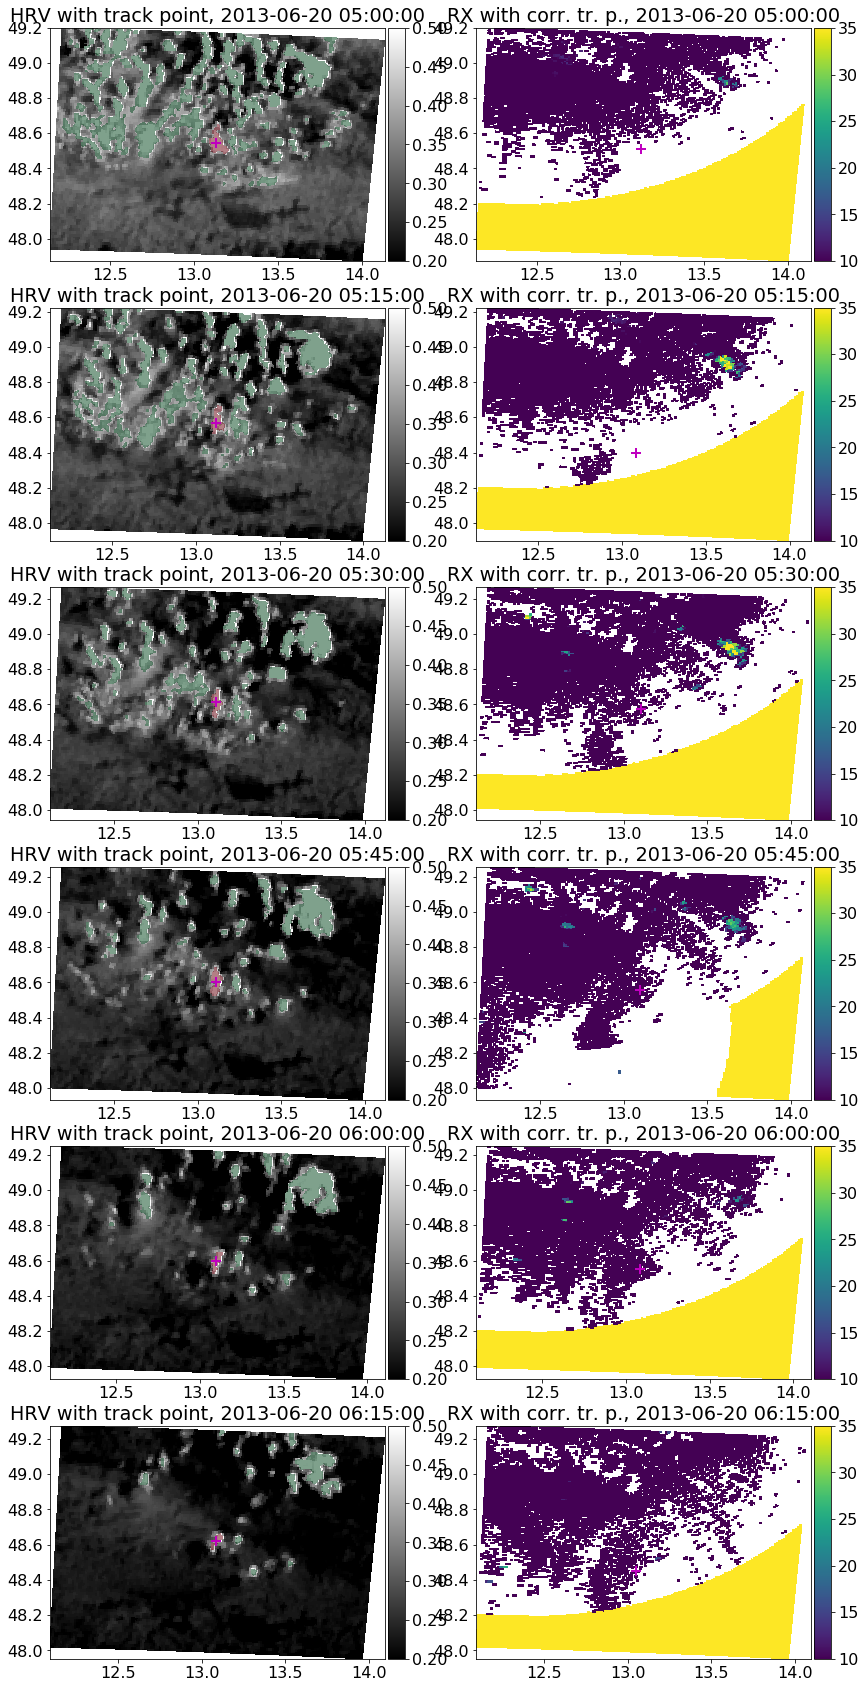

In [194]:
plot = plot_graph_with_hrv(graph_data,hrv_data.hrv.data,rx_data.dbz.data[::3],hobj,hrv_data.lon.data,hrv_data.lat.data,150)


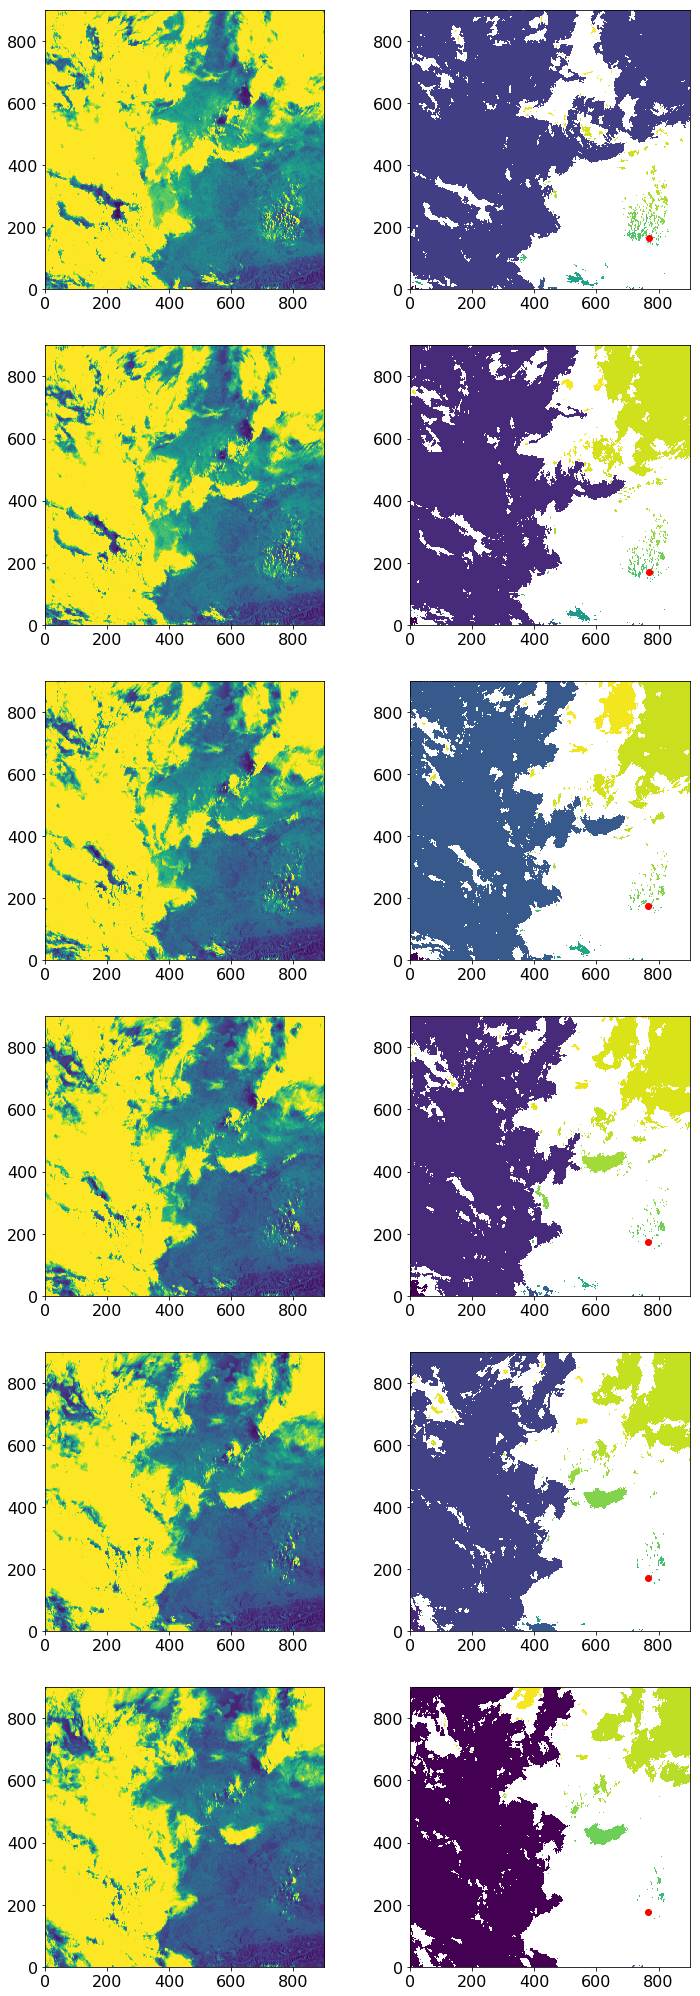

In [183]:
fig, a = pl.subplots(nrows = len(graph_data), ncols = 2, figsize = (12,6*len(graph_data))) 
for i,r in graph_data.iterrows():
        a[i][0].imshow(hrv_data.hrv.data[r.tstep], vmax = 0.6)
        a[i][1].imshow(np.ma.log(hobj[r.tstep]))
        a[i][1].plot(r.col, r.row, 'ro')
        
for ax in a.flatten():
    ax.set_ylim(0,900)

In [150]:
len(graph_data)

7

__Comments__:

1 - nice CI event - could be that RX > 35 dBZ lifes too short...

## Issues

* duplicates in the isolated graphs list!!

In [152]:
pd.DataFrame(tracks[1])

col  label  object_size    row                time
0  797.0    109           54  271.0 2013-06-20 05:45:00
1  798.0     72          104  274.0 2013-06-20 06:00:00
2  800.0     53          208  277.0 2013-06-20 06:15:00
3  803.0     45          181  282.0 2013-06-20 06:30:00
4  804.0     38          208  285.0 2013-06-20 06:45:00
5  804.0     50          159  287.0 2013-06-20 07:00:00
6  805.0     52          154  290.0 2013-06-20 07:15:00
7  802.0     90          156  296.0 2013-06-20 07:30:00

In [154]:
pd.DataFrame(tracks[2])

col  label  object_size    row                time
0  798.0     72           54  274.0 2013-06-20 06:00:00
1  800.0     53          104  277.0 2013-06-20 06:15:00
2  803.0     45          208  282.0 2013-06-20 06:30:00
3  804.0     38          181  285.0 2013-06-20 06:45:00
4  804.0     50          208  287.0 2013-06-20 07:00:00
5  805.0     52          159  290.0 2013-06-20 07:15:00
6  802.0     90          156  296.0 2013-06-20 07:30:00

In [158]:
print len(graphs)
filtered_graphs = ct.filter_graphs(graphs,3,True, False)  


547
Filtering 547 graphs, this make take a longer while...
Filtering graphs


In [161]:
def gra2tra( filtered_graphs):
        
        oid = 0
        tracks = {}
        
        for graph in filtered_graphs:  
            if isinstance(graph,list):
                graph = graph[0]
                
            attributes = ct.get_attributes_from_graph(graph)
            t_graph = ct.sort_graph_by_timesteps(graph)
            
            t_idx = sorted(t_graph.keys())
            track_time = [time[20:68][t] for t in t_idx]
            
            object_size = []
            for node in graph.nodes():
                size = len(np.where(hrv_objects[graph.node[node]['itime']] == graph.node[node]['label'])[0])
                object_size.append(size)
            
            tracks[oid] = {'time':[datetime.datetime.strptime(t,"%Y%m%d_%H%M") for t in track_time],
                     'col':attributes['col'],
                     'row':attributes['row'],
                     'label':attributes['label'],
                     'object_size':object_size}
            
            #track_df = pd.DataFrame(track)
            
            #save_name = "{}hrv_object_track_{}_{}.csv".format(save_folder,date,str(oid).zfill(7))
            
            #track_df.to_csv(save_name,index=False)
            
            oid += 1
        return tracks

In [204]:
g = filtered_graphs[0]
t_graph = ct.sort_graph_by_timesteps(g)
t_idx = sorted(t_graph.keys())
print t_idx
time[20:68]
nx.get_node_attributes(g, 'itime')

[35, 36, 37]


{'20130620_1345_0218': 35, '20130620_1400_0210': 36, '20130620_1415_0198': 37}

In [169]:
tracks = gra2tra(filtered_graphs)

0 3
1 6
2 3
3 4
4 3
5 4
6 3
7 3
8 7
9 3
10 3
11 3
12 3
13 3
14 3
15 3
16 3
17 3
18 3
19 4
20 3
21 3
22 3
23 3
24 4
25 3
26 3
27 3
28 3
29 4
30 3
31 4
32 3
33 3
34 3
35 3
36 3
37 3
38 3
39 3
40 3
41 4
42 3
43 3
44 3
45 5
46 3
47 3


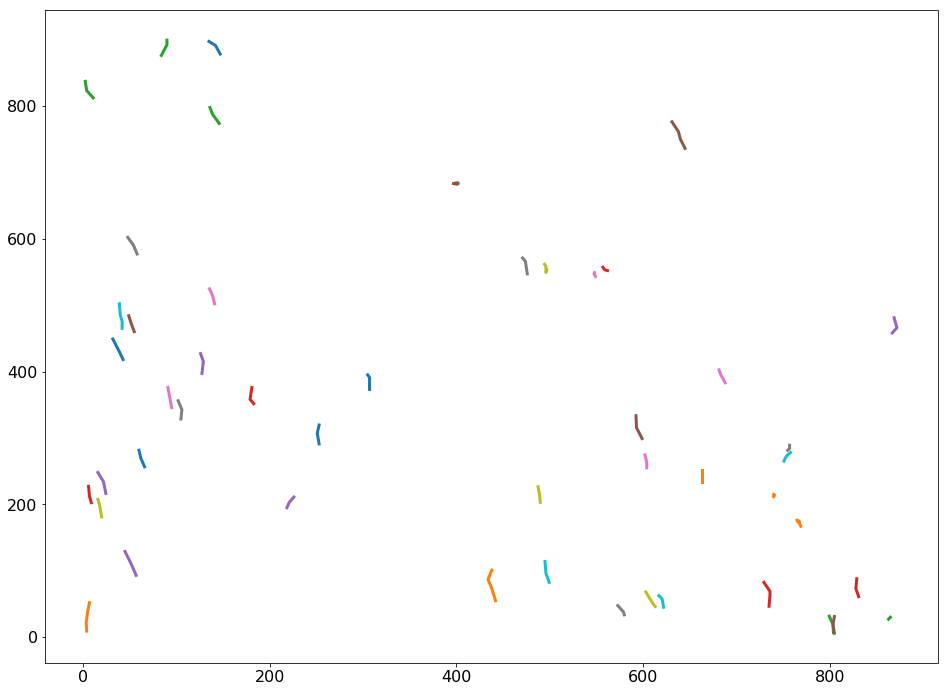

In [173]:
for oid in sorted( tracks.keys()):
    
    tr = tracks[oid]
    print oid, len( tr['col'])
    
    c = tr['col'][:]
    r = tr['row'][:]
    
    pl.plot(c,r)